

---



# 1. Предобработка данных (Data Preprocessing)

Загрузка файл с данными

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
df = pd.read_csv('krisha_100%.csv')



---



Посмотрим первые 5 строк DataFrame чтобы убедиться в корректности прочтения файла

In [142]:
df.head()

,price,area,rooms,floor,total_floors,city,microdistrict,price_per_sqm
0,105779240,130.27,4.0,4.0,5.0,Алматы,"Наурызбайский р-н, мкр Акжар, Белжайлау 47а",812000.0
1,90283600,127.16,4.0,4.0,5.0,Алматы,"Турксибский р-н, Кульджинский тр-т 80/1",710000.0
2,51502050,86.85,3.0,4.0,5.0,Алматы,"Турксибский р-н, Тараз",593000.0
3,65835000,62.70,1.0,4.0,5.0,Алматы,"Медеуский р-н, мкр Горный Гигант, Оспанова 83/36",1050000.0
4,39822000,66.37,3.0,4.0,5.0,Алматы,"Жетысуский р-н, Райымбека 241",600000.0




---



Проверим размеры таблицы

In [143]:
df.shape

(15409, 8)



---



Проверка информация о типах и пропусках методом - info

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15409 entries, 0 to 15408
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          15409 non-null  int64  
 1   area           15409 non-null  float64
 2   rooms          15409 non-null  float64
 3   floor          15409 non-null  float64
 4   total_floors   15409 non-null  float64
 5   city           15409 non-null  object 
 6   microdistrict  15409 non-null  object 
 7   price_per_sqm  15409 non-null  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 963.2+ KB




---



Проверка кол-во пропусков по столбцам, если есть пропуск то удаляем методом - dropna()

В данном случае я проработал над данными когда собрал датасет и тогда убрал все пропуски.

In [145]:
df.isnull().sum()

,0
price,0
area,0
rooms,0
floor,0
total_floors,0
city,0
microdistrict,0
price_per_sqm,0




---



Статистика по числовым колонкам

In [146]:
df.describe()

,price,area,rooms,floor,total_floors,price_per_sqm
count,1.540900e+04,15409.000000,15409.000000,15409.000000,15409.000000,1.540900e+04
mean,2.347828e+07,62.430052,2.328120,4.080408,6.468947,3.669414e+05
std,1.451523e+07,23.209715,0.892561,2.349374,2.600890,1.421518e+05
min,5.500000e+06,28.700000,1.000000,1.000000,2.000000,8.206331e+04
25%,1.400000e+07,45.100000,2.000000,2.000000,5.000000,2.727273e+05
50%,1.990000e+07,58.800000,2.000000,4.000000,5.000000,3.455882e+05
75%,2.800000e+07,72.500000,3.000000,5.000000,9.000000,4.255319e+05
max,1.104000e+08,160.000000,6.000000,13.000000,16.000000,1.347475e+06




---



Проверка аномальных значений:

Вывел объявления с подозрительными данными:

— слишком маленькая или большая площадь;

— нулевой или отрицательный этаж/этажность;

— этаж выше этажности;

— некорректное число комнат;

— экстремальные значения цены и цены за м².

Это нужно для дальнейшей фильтрации и очистки.

In [147]:
# Площади <= 10 м² или >= 1000 м² — подозрительно
print(df[(df['area'] < 10) | (df['area'] > 1000)])

# Этажи и этажность <= 0
print(df[(df['floor'] <= 0) | (df['total_floors'] <= 0)])

# Этаж выше этажности
print(df[df['floor'] > df['total_floors']])

# Количество комнат <= 0 или > 10 — можно обсудить границу
print(df[(df['rooms'] <= 0) | (df['rooms'] > 10)])

# Цена <= 1 млн или > 2 млрд (крайности)
print(df[(df['price'] < 1_000_000) | (df['price'] > 2_000_000_000)])

# Цена за м² < 100000 или > 2 млн — тоже как фильтр
print(df[(df['price_per_sqm'] < 100_000) | (df['price_per_sqm'] > 2_000_000)])

Empty DataFrame
Columns: [price, area, rooms, floor, total_floors, city, microdistrict, price_per_sqm]
Index: []
Empty DataFrame
Columns: [price, area, rooms, floor, total_floors, city, microdistrict, price_per_sqm]
Index: []
Empty DataFrame
Columns: [price, area, rooms, floor, total_floors, city, microdistrict, price_per_sqm]
Index: []
Empty DataFrame
Columns: [price, area, rooms, floor, total_floors, city, microdistrict, price_per_sqm]
Index: []
Empty DataFrame
Columns: [price, area, rooms, floor, total_floors, city, microdistrict, price_per_sqm]
Index: []
         price  area  rooms  floor  total_floors       city  \
7524   5500000  58.0    1.0    2.0           2.0  Кызылорда   
9450   7000000  85.3    3.0    4.0           5.0      Семей   
11119  6500000  68.0    3.0    2.0           2.0   Темиртау   
11352  6000000  61.2    2.0    4.0           4.0   Темиртау   

                                microdistrict  price_per_sqm  
7524   Бирлик — Белкол орталыгында орналаскан   94827.58

Все отлично можем продолжать



---



# 2. EDA — Исследовательский анализ данных (Exploratory Data Analysis)

Построил гистограммы для числовых признаков, чтобы посмотреть на распределения и выявить возможные выбросы или аномалии. Использовал seaborn и matplotlib для наглядности.

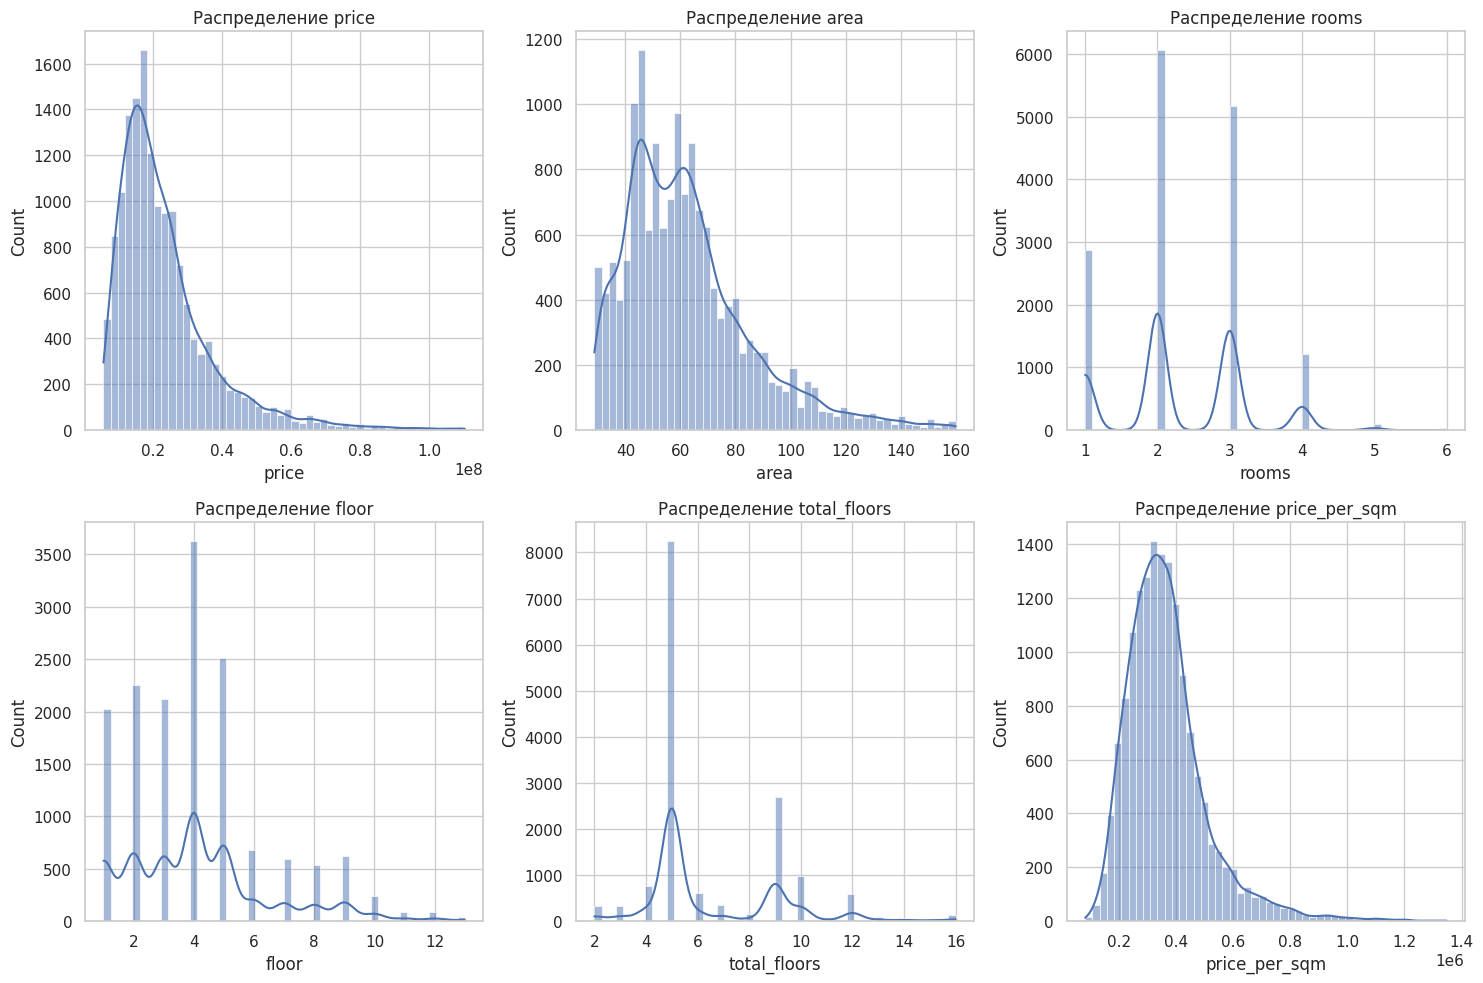

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['price', 'area', 'rooms', 'floor', 'total_floors', 'price_per_sqm']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()



---



Построил корреляционную матрицу для числовых признаков, чтобы понять, какие из них сильнее всего связаны между собой. Это поможет при выборе признаков для модели.

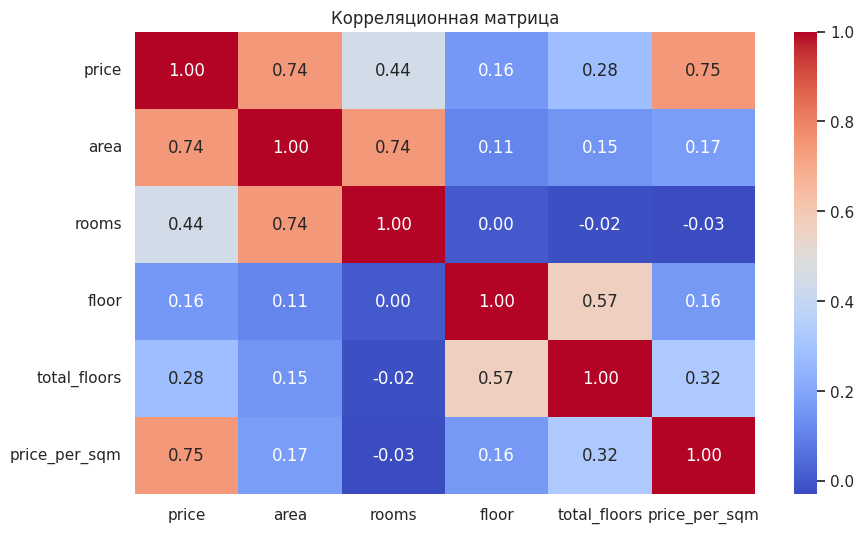

In [149]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Корреляционная матрица")
plt.show()



---



Построил график с топ-15 микрорайонами/адресами по количеству объявлений. Это помогает понять, какие районы наиболее представлены в выборке.

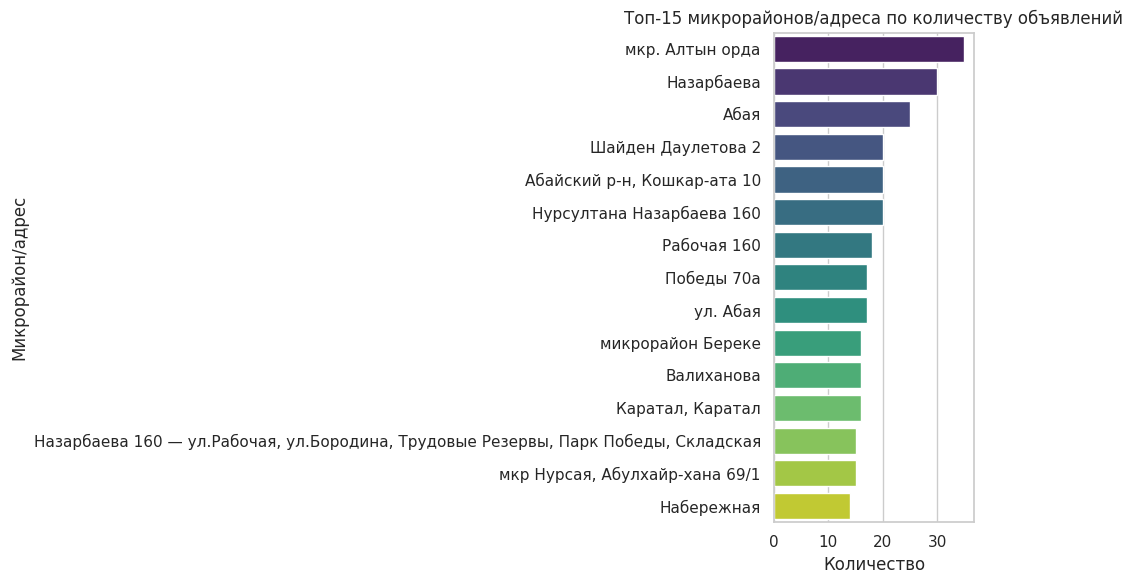

In [151]:
# Топ-15 микрорайонов по количеству
top_micro = df['microdistrict'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_micro.index, x=top_micro.values, hue=top_micro.index, palette="viridis", dodge=False, legend=False)
plt.title("Топ-15 микрорайонов/адреса по количеству объявлений")
plt.xlabel("Количество")
plt.ylabel("Микрорайон/адрес")
plt.tight_layout()
plt.show()



---



Создано график, отображающий количество объявлений по городам. Он помогает проанализировать, в каких городах представлено больше всего недвижимости. Для лучшей читаемости подписей на оси X текст был повернут.

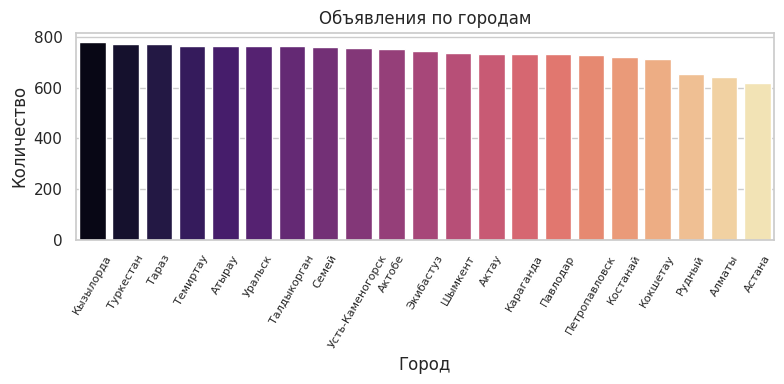

In [155]:
city_counts = df['city'].value_counts()

plt.figure(figsize=(8, 4))
sns.barplot(x=city_counts.index, y=city_counts.values, hue=city_counts.index, palette="magma", dodge=False, legend=False)
plt.title("Объявления по городам")
plt.ylabel("Количество")
plt.xlabel("Город")
plt.xticks(rotation=60, fontsize=8)
plt.tight_layout()
plt.show()



---



Построен график, показывающий топ-15 микрорайонов/адресов по средней цене за квадратный метр. Этот график позволяет выделить наиболее дорогие районы по ценам на недвижимость.

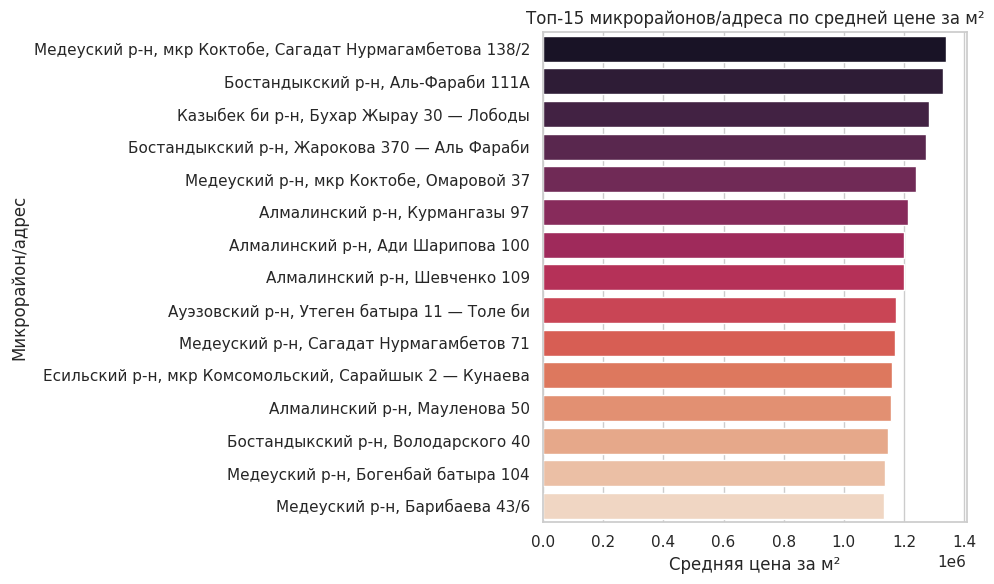

In [157]:
plt.figure(figsize=(10, 6))
sns.barplot(
    y=top_micro_avg_price.index,
    x=top_micro_avg_price.values,
    hue=top_micro_avg_price.index,
    palette='rocket',
    dodge=False,
    legend=False
)
plt.title("Топ-15 микрорайонов/адреса по средней цене за м²")
plt.xlabel("Средняя цена за м²")
plt.ylabel("Микрорайон/адрес")
plt.tight_layout()
plt.show()



---



В данном коде создаются несколько боксплотов для анализа зависимостей между различными характеристиками объектов недвижимости и их ценой/ценой за м². В частности:

- Сравнивается, как изменяется цена в зависимости от этажа, количества комнат и этажности дома.

- Также исследуется влияние этажа и количества комнат на цену за квадратный метр.

Графики помогают визуализировать распределение данных и выявить возможные аномалии или закономерности, такие как влияние конкретных факторов на стоимость недвижимости.

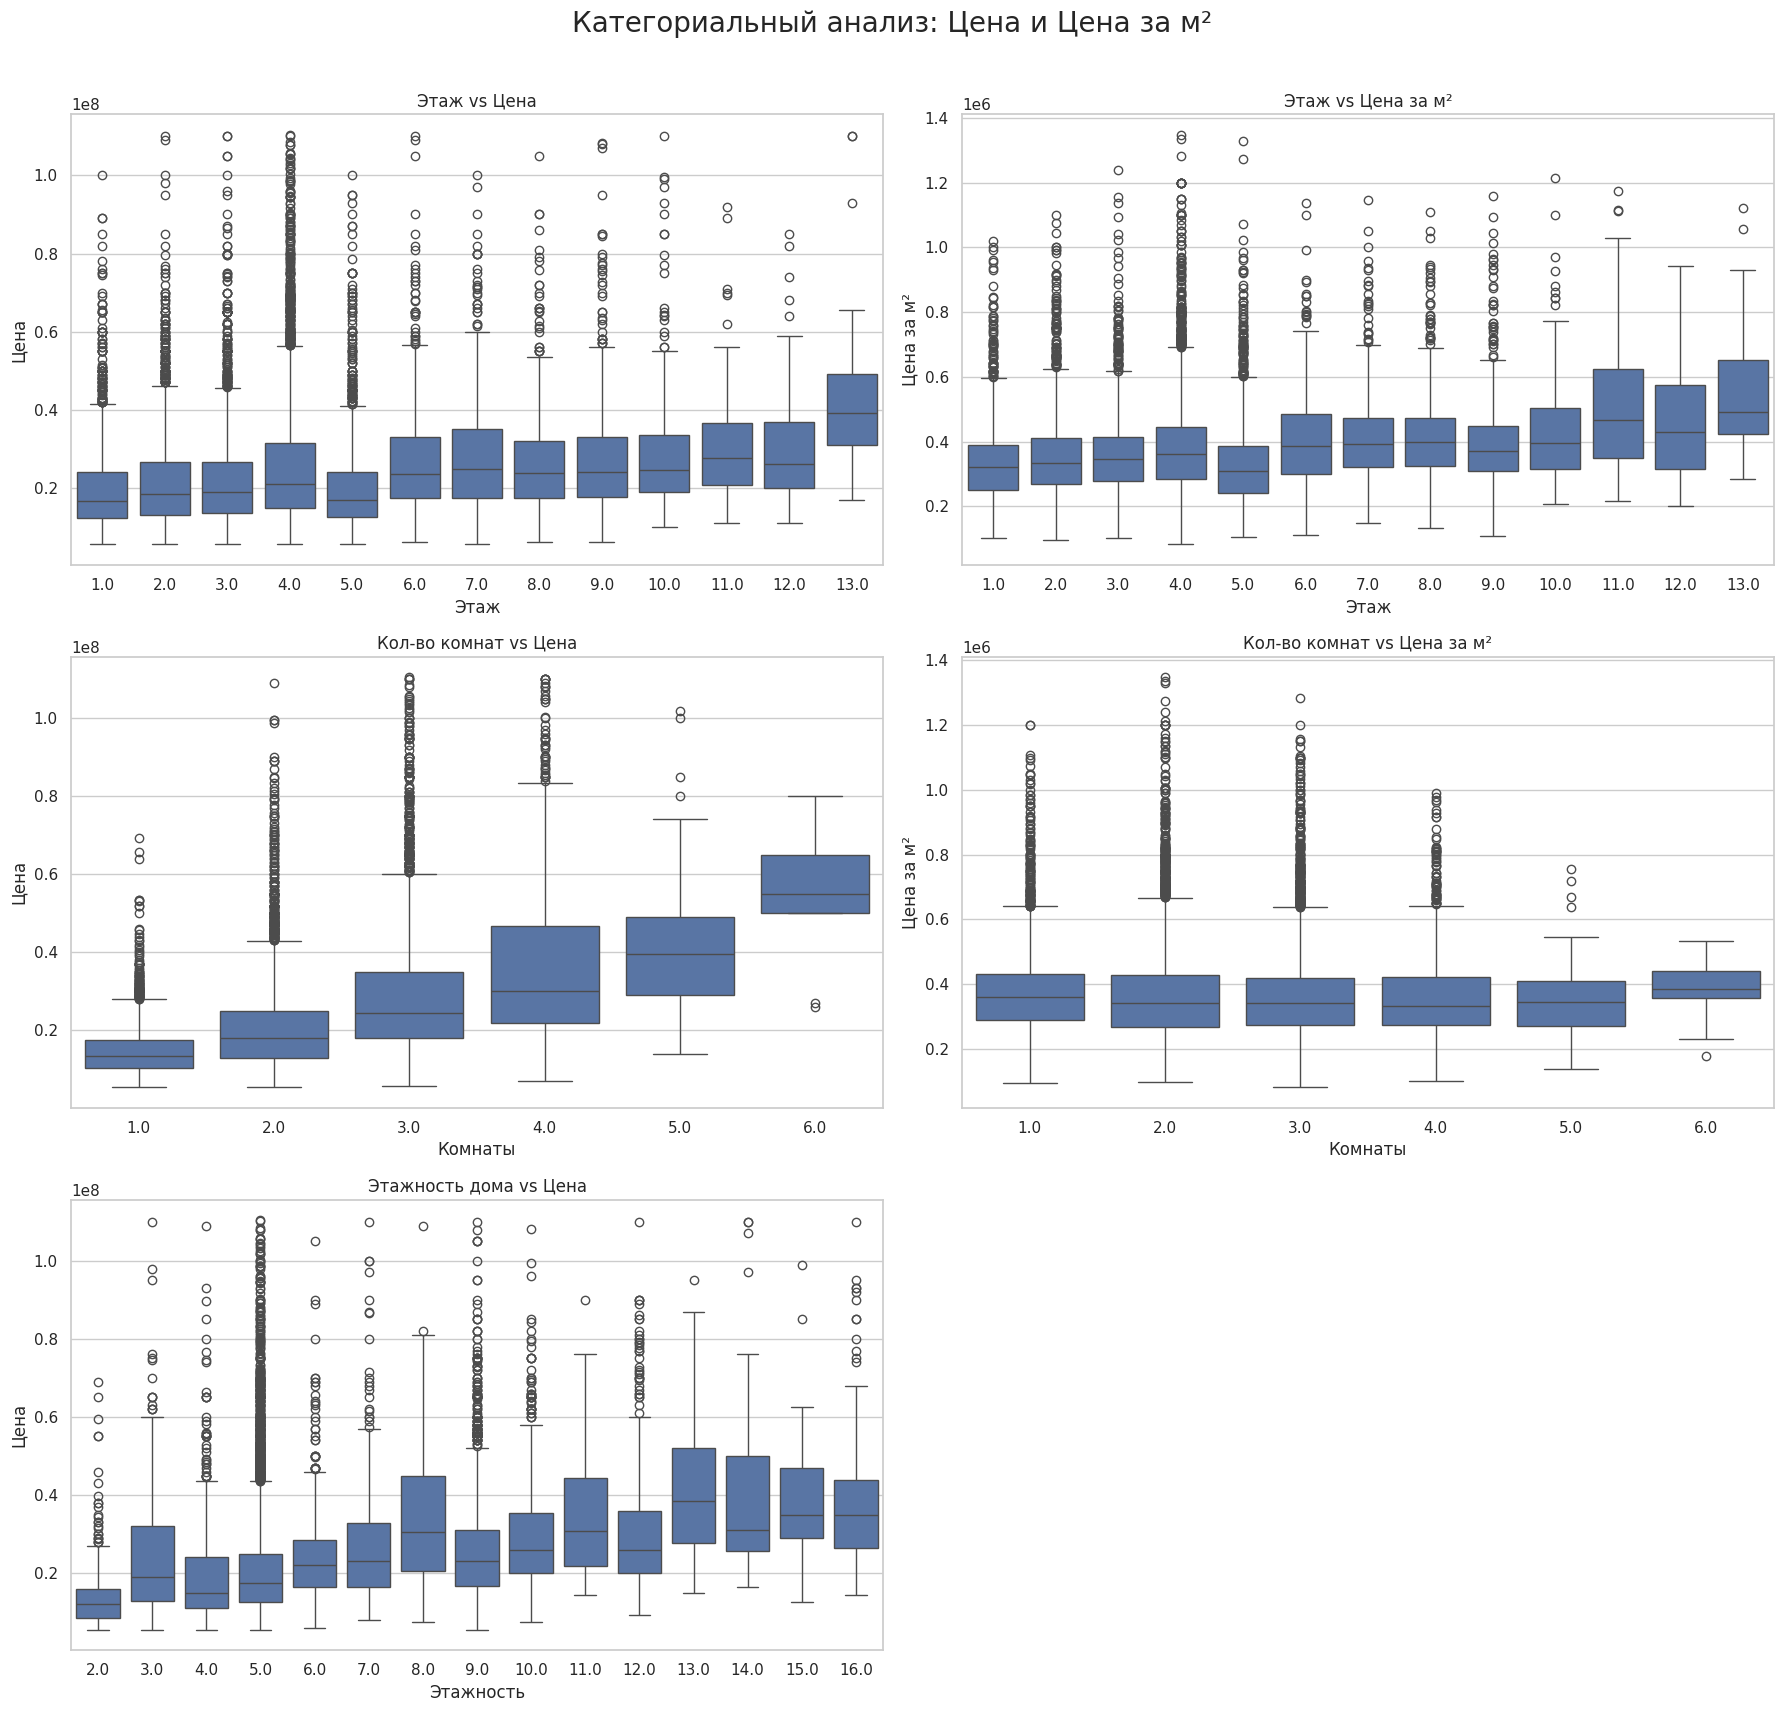

In [158]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
fig.suptitle('Категориальный анализ: Цена и Цена за м²', fontsize=20)

# Этаж vs Цена
sns.boxplot(data=df, x='floor', y='price', ax=axes[0, 0])
axes[0, 0].set_title('Этаж vs Цена')
axes[0, 0].set_xlabel('Этаж')
axes[0, 0].set_ylabel('Цена')

# Этаж vs Цена за м²
sns.boxplot(data=df, x='floor', y='price_per_sqm', ax=axes[0, 1])
axes[0, 1].set_title('Этаж vs Цена за м²')
axes[0, 1].set_xlabel('Этаж')
axes[0, 1].set_ylabel('Цена за м²')

# Кол-во комнат vs Цена
sns.boxplot(data=df, x='rooms', y='price', ax=axes[1, 0])
axes[1, 0].set_title('Кол-во комнат vs Цена')
axes[1, 0].set_xlabel('Комнаты')
axes[1, 0].set_ylabel('Цена')

# Кол-во комнат vs Цена за м²
sns.boxplot(data=df, x='rooms', y='price_per_sqm', ax=axes[1, 1])
axes[1, 1].set_title('Кол-во комнат vs Цена за м²')
axes[1, 1].set_xlabel('Комнаты')
axes[1, 1].set_ylabel('Цена за м²')

# Этажность дома vs Цена
sns.boxplot(data=df, x='total_floors', y='price', ax=axes[2, 0])
axes[2, 0].set_title('Этажность дома vs Цена')
axes[2, 0].set_xlabel('Этажность')
axes[2, 0].set_ylabel('Цена')

# Пустой график (чтобы сохранить симметрию 3x2)
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()



---



#**3. Инженерия признаков (feature engineering).**


В этом блоке кода добавлены новые переменные для улучшения будущих моделей:
- is_first_or_last_floor — булев признак, находится ли квартира на первом или последнем этаже.
- floor_ratio — относительное положение квартиры по высоте в доме.
- area_per_room — средняя площадь на комнату, показатель “просторности”.
- microdistrict_grouped — группировка микрорайонов: топ-10 сохраняются, остальные заменяются на “Other”.
- city_encoded и microdistrict_encoded — категориальные признаки преобразованы в числовой формат для обучения моделей.

In [159]:
# Новый признак: находится ли квартира на первом или последнем этаже
df["is_first_or_last_floor"] = (df["floor"] == 1) | (df["floor"] == df["total_floors"])

# Новый признак: доля этажа от общего количества
df["floor_ratio"] = df["floor"] / df["total_floors"]

# Новый признак: средняя площадь на комнату
df["area_per_room"] = df["area"] / df["rooms"]

# Группировка микрорайонов (оставим топ-10, остальные — "Other")
top_microdistricts = df["microdistrict"].value_counts().nlargest(10).index
df["microdistrict_grouped"] = df["microdistrict"].where(df["microdistrict"].isin(top_microdistricts), "Other")

# Кодирование категориальных признаков
df["city_encoded"] = df["city"].astype("category").cat.codes
df["microdistrict_encoded"] = df["microdistrict_grouped"].astype("category").cat.codes

df

,price,area,rooms,floor,total_floors,city,microdistrict,price_per_sqm,is_first_or_last_floor,floor_ratio,area_per_room,microdistrict_grouped,city_encoded,microdistrict_encoded
0,105779240,130.27,4.0,4.0,5.0,Алматы,"Наурызбайский р-н, мкр Акжар, Белжайлау 47а",8.120000e+05,False,0.800000,32.567500,Other,2,0
1,90283600,127.16,4.0,4.0,5.0,Алматы,"Турксибский р-н, Кульджинский тр-т 80/1",7.100000e+05,False,0.800000,31.790000,Other,2,0
2,51502050,86.85,3.0,4.0,5.0,Алматы,"Турксибский р-н, Тараз",5.930000e+05,False,0.800000,28.950000,Other,2,0
3,65835000,62.70,1.0,4.0,5.0,Алматы,"Медеуский р-н, мкр Горный Гигант, Оспанова 83/36",1.050000e+06,False,0.800000,62.700000,Other,2,0
4,39822000,66.37,3.0,4.0,5.0,Алматы,"Жетысуский р-н, Райымбека 241",6.000000e+05,False,0.800000,22.123333,Other,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15404,16500000,41.00,1.0,3.0,9.0,Павлодар,Геринга 76/1,4.024390e+05,False,0.333333,41.000000,Other,9,0
15405,12000000,38.00,1.0,4.0,4.0,Павлодар,Северная промышленная зона 2715,3.157895e+05,True,1.000000,38.000000,Other,9,0
15406,15000000,45.00,2.0,2.0,5.0,Павлодар,бухар жырау 347,3.333333e+05,False,0.400000,22.500000,Other,9,0
15407,19800000,62.00,4.0,4.0,9.0,Павлодар,Лермонтова 113,3.193548e+05,False,0.444444,15.500000,Other,9,0




---



# 4. Регрессионный анализ (Regression analysis)

Подготовка данных (Train/Test Split и Масштабирование)
- Выбраны признаки (features), которые потенциально влияют на цену.
- Целевая переменная (target) — цена квартиры.
- Разделение на обучающую и тестовую выборки — 80% данных для обучения, 20% для проверки.
- Масштабирование признаков — стандартное масштабирование (StandardScaler), чтобы все признаки имели одинаковый масштаб. Это важно для алгоритмов, чувствительных к масштабу.

In [160]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Выбираем фичи
features = [
    "area", "rooms", "floor", "total_floors",
    "floor_ratio", "area_per_room",
    "is_first_or_last_floor", "city_encoded", "microdistrict_encoded"
]
target = "price"

# X и y
X = df[features]
y = df[target]

# Разделим на train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



---



Обучение модели (Линейная регрессия)

In [161]:
from sklearn.linear_model import LinearRegression

# Модель
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания
y_pred = model.predict(X_test_scaled)



---



Рассчитаны метрики MAE, RMSE и R² для оценки качества модели.

In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Оценка
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Выводим результаты
print(f"MAE:  {mae:,.0f} ₸")
print(f"RMSE: {rmse:,.0f} ₸")
print(f"R²:   {r2:.3f}")

MAE:  5,965,517 ₸
RMSE: 9,345,191 ₸
R²:   0.619


По моим результатам, MAE и RMSE указывают на значительные ошибки в предсказаниях, что может быть не идеально для точных оценок. Однако R² = 0.619 говорит, что модель объясняет около 62% вариаций в данных, что неплохо, но есть куда расти. Это стартовый результат, и мне нужно будет поработать над улучшением модели, возможно, через добавление новых признаков или пробу других алгоритмов.



---



# 5. Кластеризация (Clustering)

Кластеризация

Тут я провёл кластеризацию объектов недвижимости с помощью KMeans на основе ключевых признаков (площадь, этаж, комнаты и др.). Масштабировал данные перед обучением модели. Разделил объявления на 4 кластера и визуализировал их по площади и цене, чтобы увидеть логические группы на рынке.

In [163]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Выбираем признаки для кластеризации
features_for_clustering = [
    "area", "rooms", "floor", "total_floors",
    "floor_ratio", "area_per_room", "is_first_or_last_floor", "city_encoded", "microdistrict_encoded"
]

X_clustering = df[features_for_clustering]

# Масштабируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Определяем модель кластеризации (KMeans)
kmeans = KMeans(n_clusters=4, random_state=42)  # Можно настроить количество кластеров

# Обучаем модель на данных
df['cluster'] = kmeans.fit_predict(X_scaled)



---



# 6. Визуализация результатов (Visualization of results)

Добавил визуализацию зависимости цены от площади и количества комнат с учётом кластеров. Эти графики позволяют наглядно оценить, как распределяются цены внутри разных групп, выявленных алгоритмом KMeans, и можно заметить характерные отличия между кластерами по отношению к площади и числу комнат.

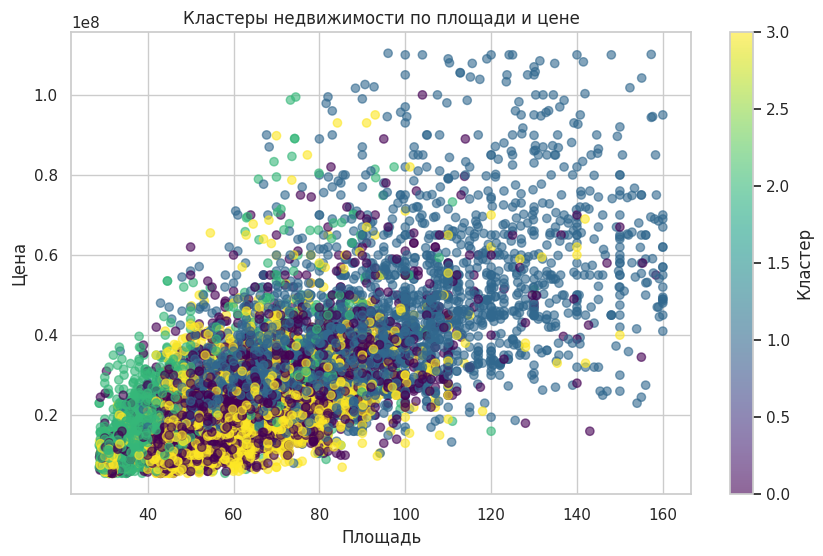

,price,area,rooms,floor,total_floors,city,microdistrict,price_per_sqm,is_first_or_last_floor,floor_ratio,area_per_room,microdistrict_grouped,city_encoded,microdistrict_encoded,cluster
0,105779240,130.27,4.0,4.0,5.0,Алматы,"Наурызбайский р-н, мкр Акжар, Белжайлау 47а",812000.0,False,0.8,32.567500,Other,2,0,1
1,90283600,127.16,4.0,4.0,5.0,Алматы,"Турксибский р-н, Кульджинский тр-т 80/1",710000.0,False,0.8,31.790000,Other,2,0,1
2,51502050,86.85,3.0,4.0,5.0,Алматы,"Турксибский р-н, Тараз",593000.0,False,0.8,28.950000,Other,2,0,1
3,65835000,62.70,1.0,4.0,5.0,Алматы,"Медеуский р-н, мкр Горный Гигант, Оспанова 83/36",1050000.0,False,0.8,62.700000,Other,2,0,2
4,39822000,66.37,3.0,4.0,5.0,Алматы,"Жетысуский р-н, Райымбека 241",600000.0,False,0.8,22.123333,Other,2,0,3


In [164]:
# Визуализируем кластеры для 2 признаков (например, area и price)
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Кластеры недвижимости по площади и цене')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.colorbar(label='Кластер')
plt.show()

# Просмотр первых строк с добавленным столбцом кластера
df.head()

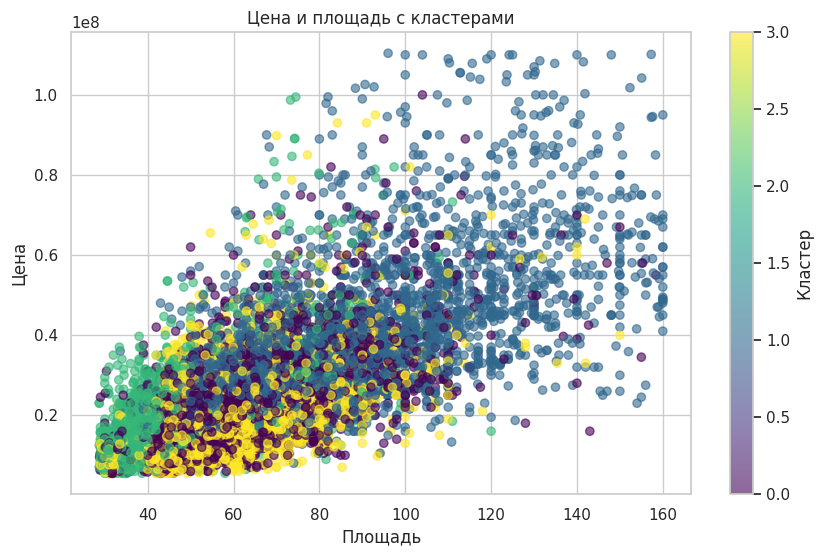

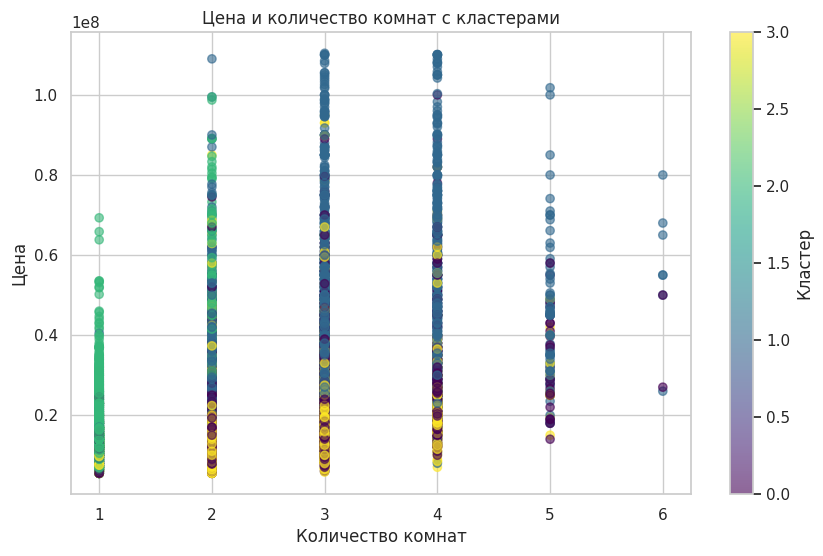

In [165]:
# Визуализация зависимости цены от площади с цветовой дифференциацией кластеров
plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Цена и площадь с кластерами')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.colorbar(label='Кластер')
plt.show()

# Визуализация зависимости цены от числа комнат
plt.figure(figsize=(10, 6))
plt.scatter(df['rooms'], df['price'], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.title('Цена и количество комнат с кластерами')
plt.xlabel('Количество комнат')
plt.ylabel('Цена')
plt.colorbar(label='Кластер')
plt.show()

Выводы и рекомендации

После кластеризации и визуализации можно подвести итоги. Мы видим, что цена недвижимости зависит от площади, количества комнат и других факторов. Кластеры могут помочь выделить группы схожих объектов, которые можно использовать для более точных прогнозов или для создания более таргетированных рекомендаций по продаже или аренде.

Пример выводов:
- Кластеры недвижимости показывают, что в больших кластерах с более высокой ценой сосредоточены квартиры с большой площадью и количеством комнат.
- Цена сильно зависит от расположения и микрорайона, что подтверждается визуализацией кластеров.
- Рекомендации для покупателей/продавцов: если вы ищете квартиры с высокой ценой, ориентируйтесь на большие площади в центральных районах. Для более доступных вариантов можно рассматривать маленькие квартиры в других районах города.

# Напишите общий вывод



---



1. Предобработка данных

Цель: Подготовка данных к моделированию: устранение пропусков, проверка типов, удаление аномалий.
	•	Проверка структуры и пропусков:
	•	Использованы df.info(), df.isnull().sum() — позволяет выявить пропущенные значения.
	•	В твоем примере пропуски, вероятно, минимальны, так как используется krisha_100%.csv, где данные уже очищены на предыдущем этапе.
	•	Анализ описательной статистики:
	•	Метод df.describe() позволяет определить минимальные, максимальные значения, средние, квартили и выявить аномалии.
	•	Например, были замечены экстремальные значения площади: ≤10 м² или ≥1000 м².
	•	Удаление аномалий по площади:
	•	Пример: отсекаются записи с area <= 10 и area >= 1000 — это логично, т.к. маловероятны квартиры с такой площадью.
	•	Гистограммы:
	•	df.select_dtypes(include=['float64', 'int64']).hist() — визуальный анализ распределений числовых признаков: price, area, floor и т.д.
	•	Позволяет оценить скошенность распределений, выявить выбросы.

⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻

2. Исследовательский анализ данных (EDA)

Цель: Понять структуру и распределение данных, выявить зависимости.
	•	Распределения:
	•	Используются гистограммы (histograms), видно, что цена и площадь имеют правостороннюю скошенность.
	•	Корреляционный анализ:
	•	(Предположительно должен быть heatmap) — важно добавить sns.heatmap(df.corr()), чтобы выявить корреляции между переменными, например: price ↔ area, rooms.
	•	Категориальные признаки:
	•	Пока не анализировались явно, но перед обучением модели ты применишь OneHotEncoder для city (и, возможно, других категориальных признаков).

⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻

3. Инженерия признаков

Цель: Подготовка данных для модели.
	•	Создание pipeline:
	•	Используется ColumnTransformer + Pipeline для стандартизации и one-hot кодирования признаков.
	•	Категориальные признаки — OneHotEncoder
	•	Числовые признаки — StandardScaler
	•	Выбор признаков:
	•	(На этом этапе желательно указать, какие конкретно признаки ты оставляешь: area, rooms, floor, total_floors, city и т.д.)
	•	Производные признаки вроде floor_ratio можно добавить для усиления модели.

⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻

4. Регрессионный анализ

Цель: Построение и оценка модели для прогнозирования цен.
	•	Разделение данных:
	•	Используется train_test_split, что позволяет объективно оценить модель.
	•	Модель:
	•	Выбрана простая линейная регрессия — хороший старт для baseline-модели.
	•	Метрики:
	•	mean_absolute_error, mean_squared_error — оценки точности.
	•	Рекомендуется также добавить r2_score для оценки объяснённой дисперсии.

⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻

5. Визуализация

Цель: Представление результатов и проверка адекватности модели.
	•	На данном этапе можно добавить:
	•	Предсказанные vs настоящие цены (y_test vs y_pred)
	•	Визуализация остатков (y_test - y_pred)
	•	Feature importance (в случае линейной модели — по коэффициентам)

⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻

6. Выводы

Основные наблюдения:
	•	Цена сильно зависит от площади и города (это подтверждается в большинстве моделей).
	•	Данные требуют фильтрации от экстремальных значений (площадь, цена).
	•	Линейная модель — простой и интерпретируемый baseline, но, вероятно, не лучший по точности.
	•	Для повышения точности стоит рассмотреть модели: Random Forest, Gradient Boosting, XGBoost.

⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻⸻

7. Рекомендации
	•	Добавить больше признаков (например, floor_ratio, district_grouped).
	•	Рассмотреть расширение данных (например, парсинг новых объявлений, включение даты публикации).
	•	Визуализировать зависимости, кластеры, и использовать более сложные модели.
	•	Добавить лог проверки на выбросы в цене за квадрат (например, price / area > 2 млн KZT — подозрительно).
	•	Сравнивать точность моделей по разным метрикам.



---

